In [1]:
import cv2 
import ast
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from os import listdir
import pandas as pd
from scipy import interpolate
from scipy import ndimage
from tools import Tools

In [2]:
data = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/interpolated.npy")
labels = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/interpolated_labels.npy")

In [25]:
def normalize(data):
    """
    normalizes across frames - axix to zero mean and standard deviation
    """
    M,N, nr_joints,_ = data.shape
    means = np.array([np.mean(ex) for ex in data])
    std = np.array([np.std(ex) for ex in data])
    data_new = [(data[i]-means[i])/(std[i]+0.000001) for i in range(len(data))]
    return np.array(data_new)

(6422,)
(6422,)
[ -1.70189877e-16  -1.13459918e-16   4.53839672e-16 ...,   9.92774282e-17
   6.80759507e-16   3.40379754e-16]


In [16]:
unique = np.unique(new_labels)
index_liste = []
for pitches in unique:
    index_liste.append(np.where(new_labels==pitches))

JOINT:  0


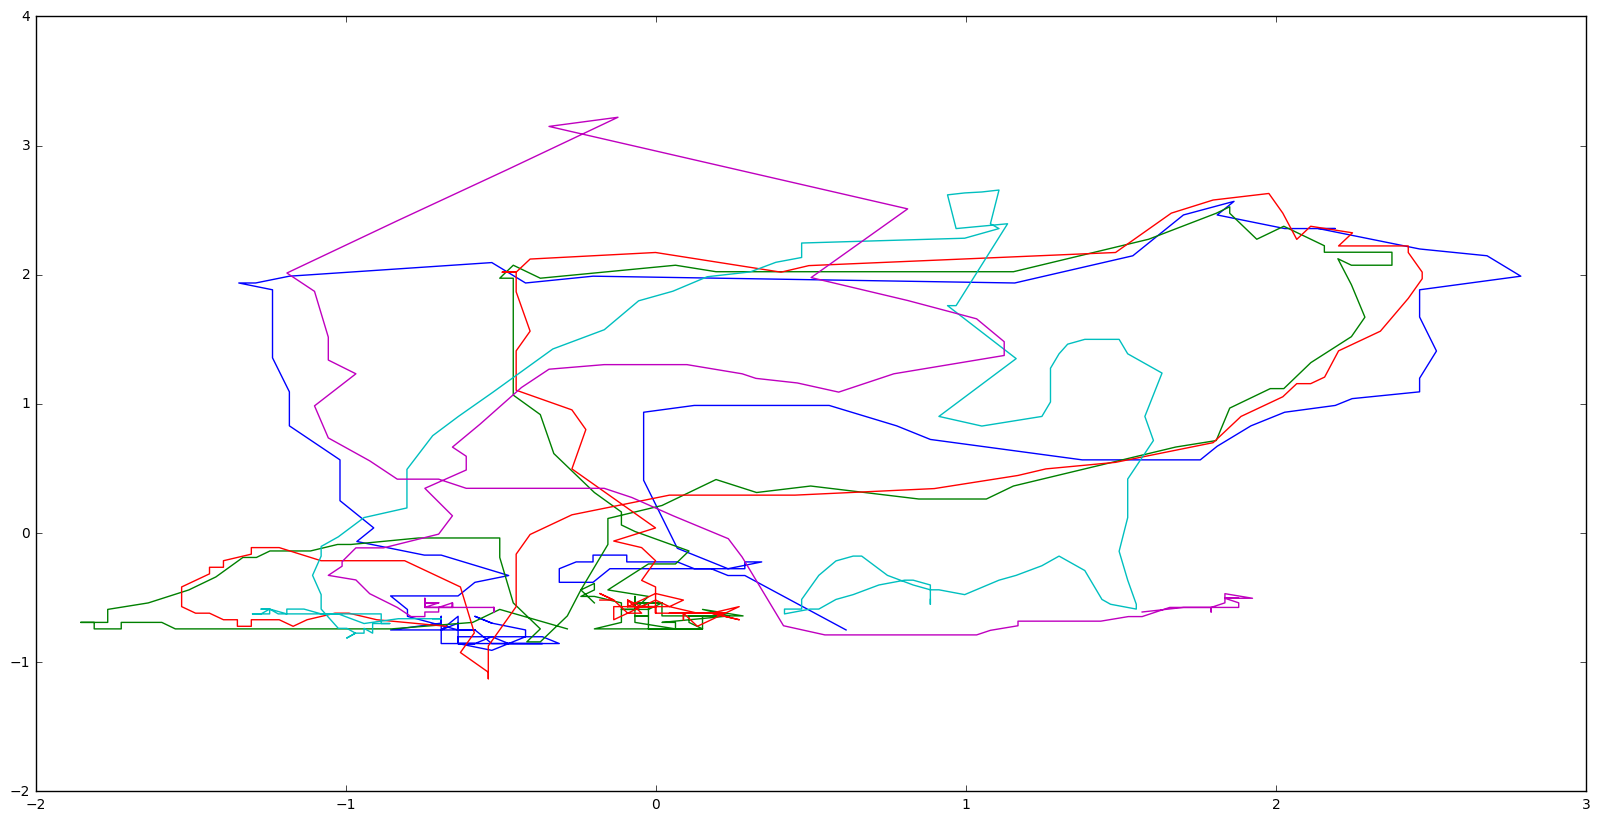

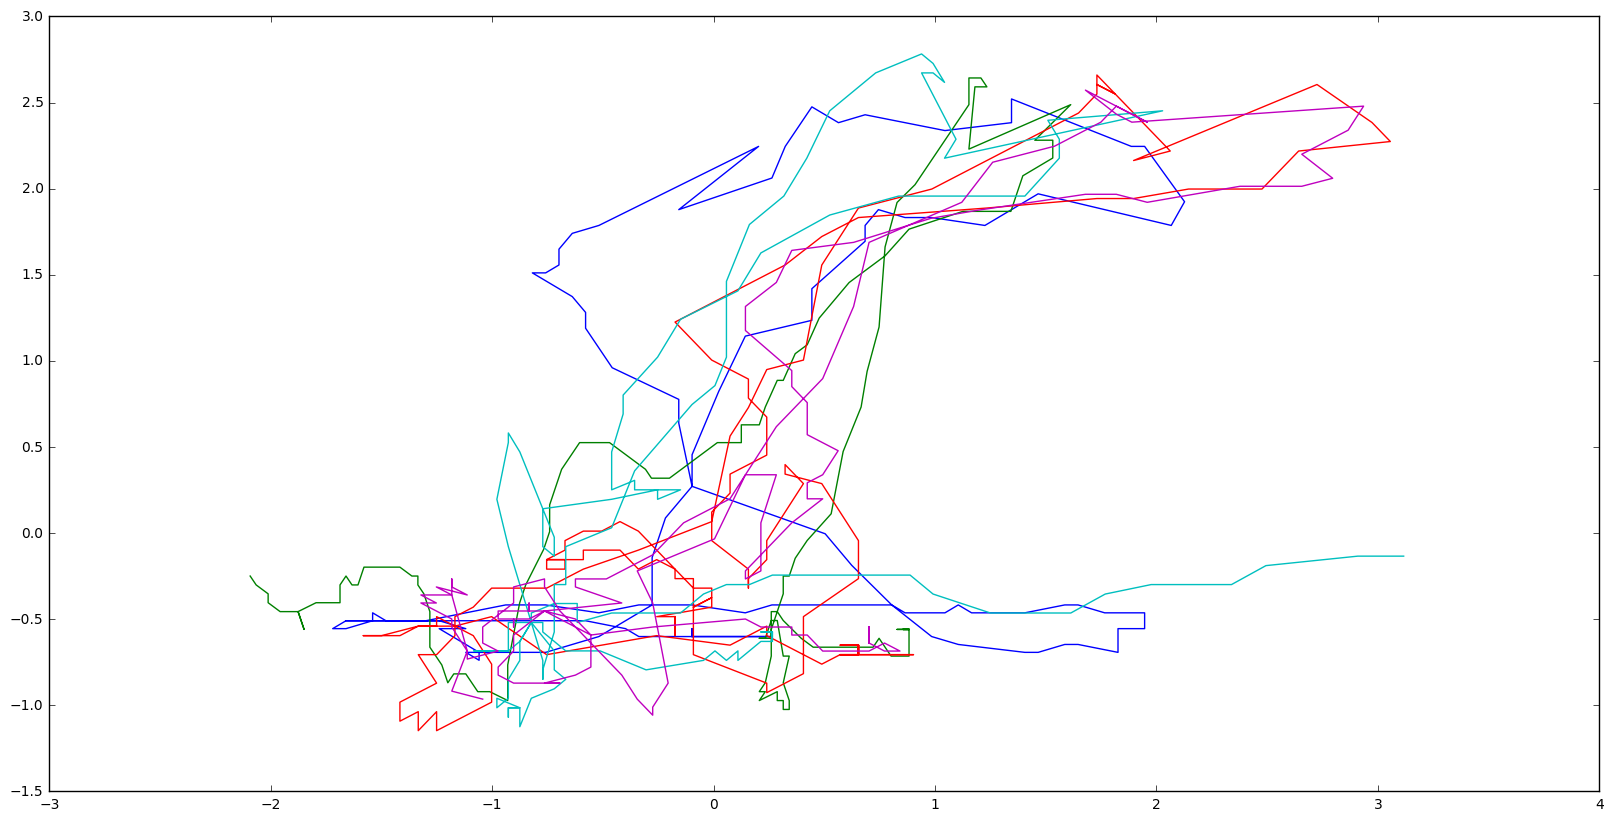

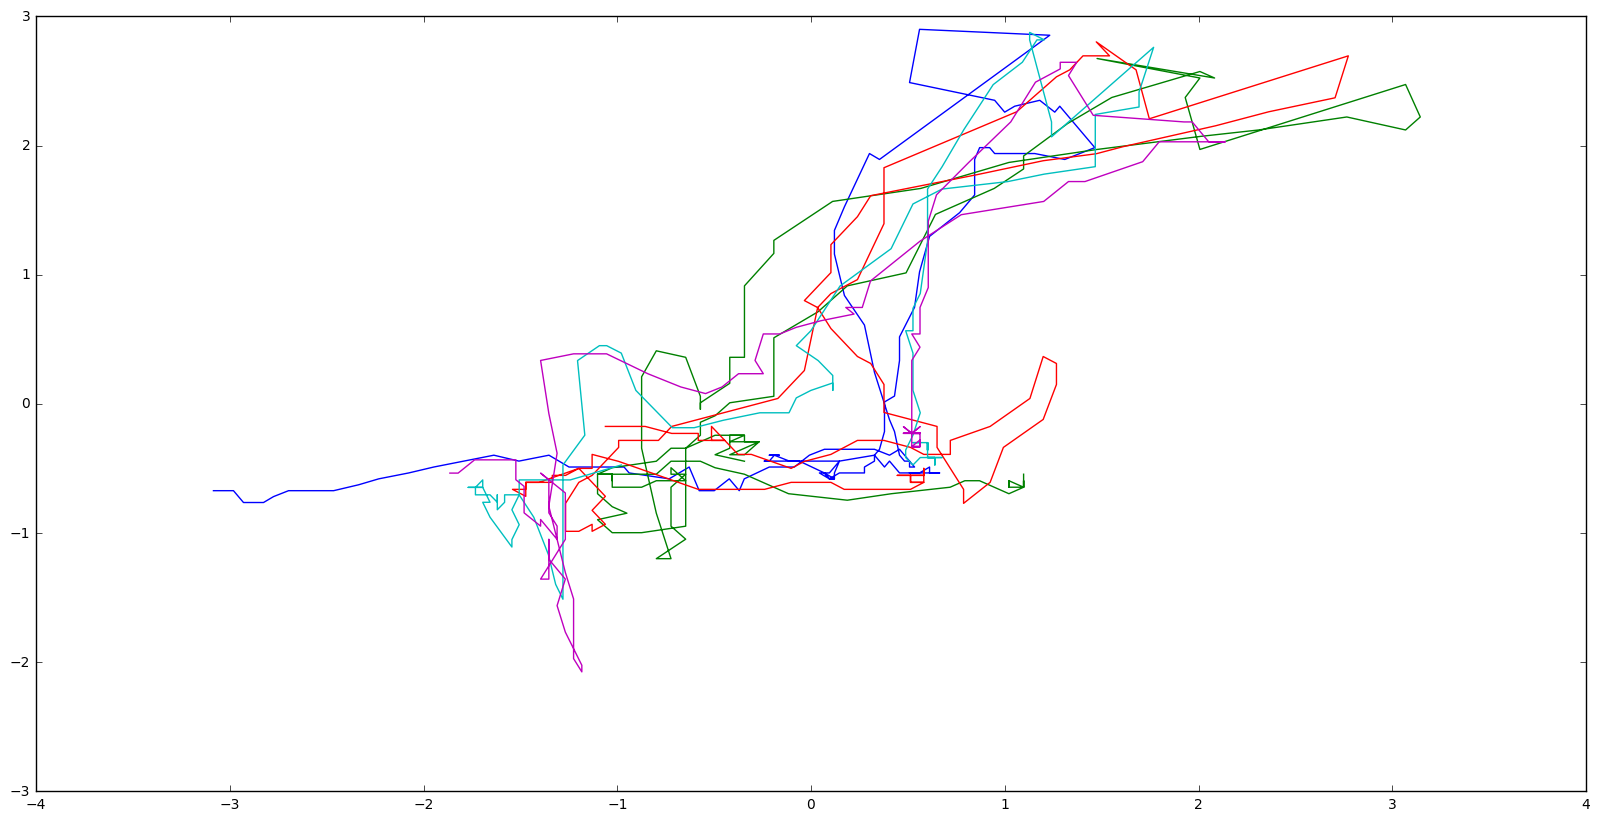

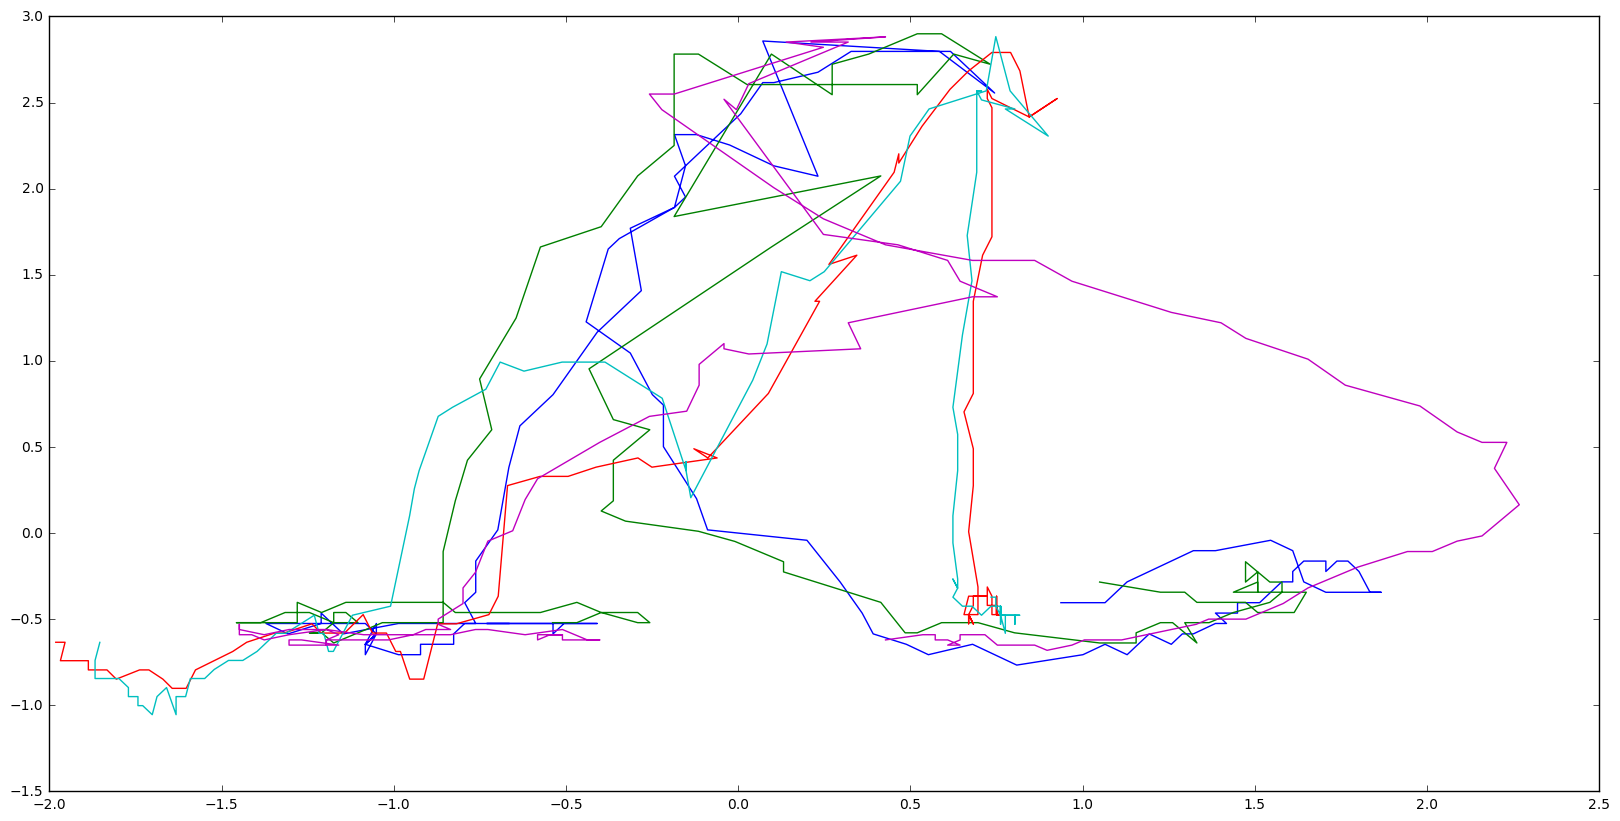

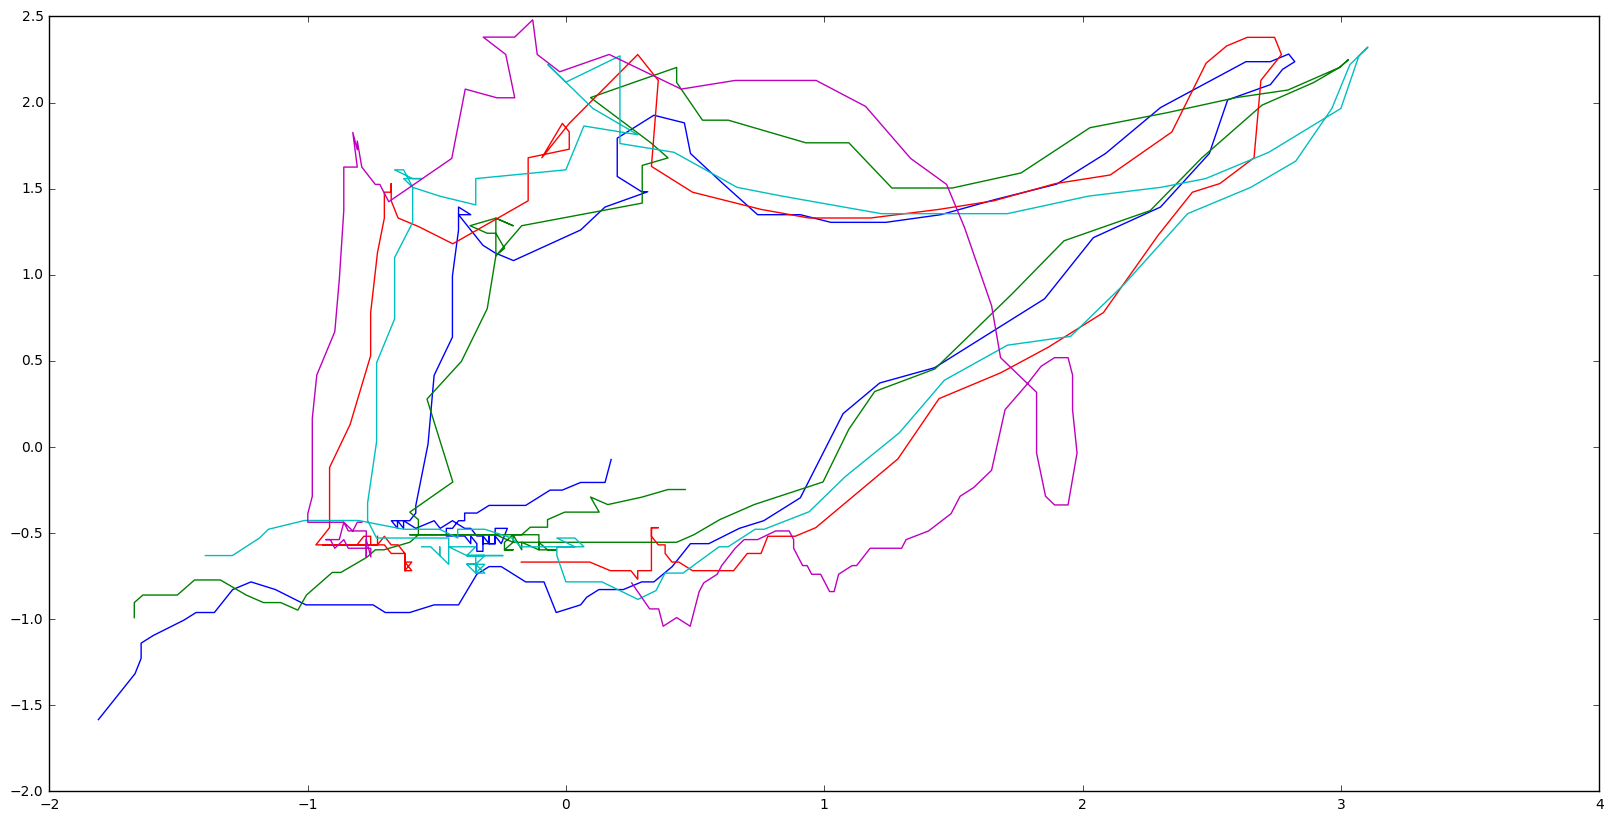

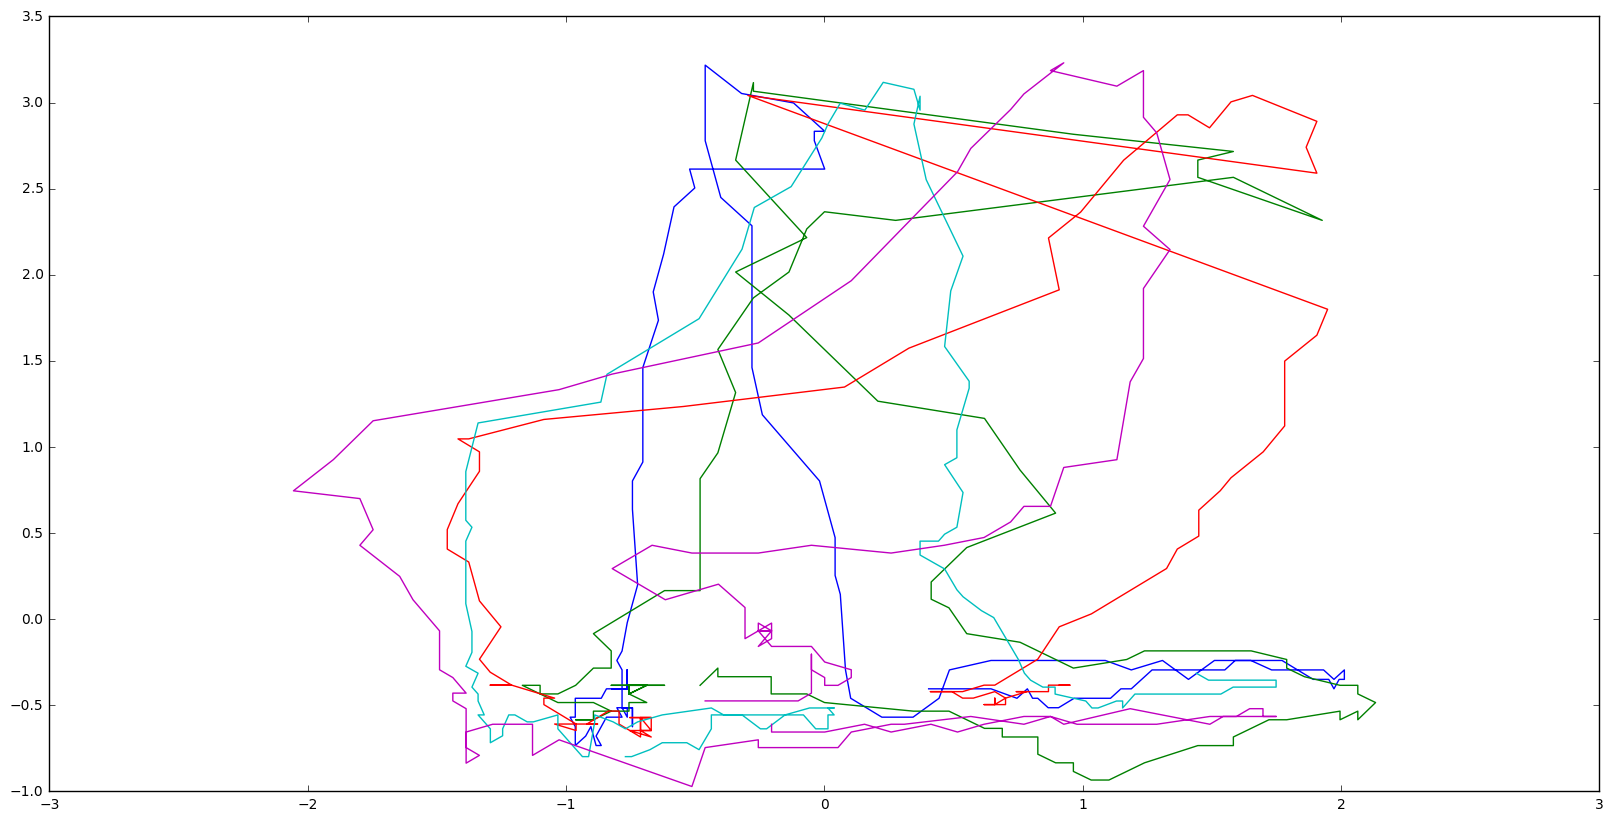

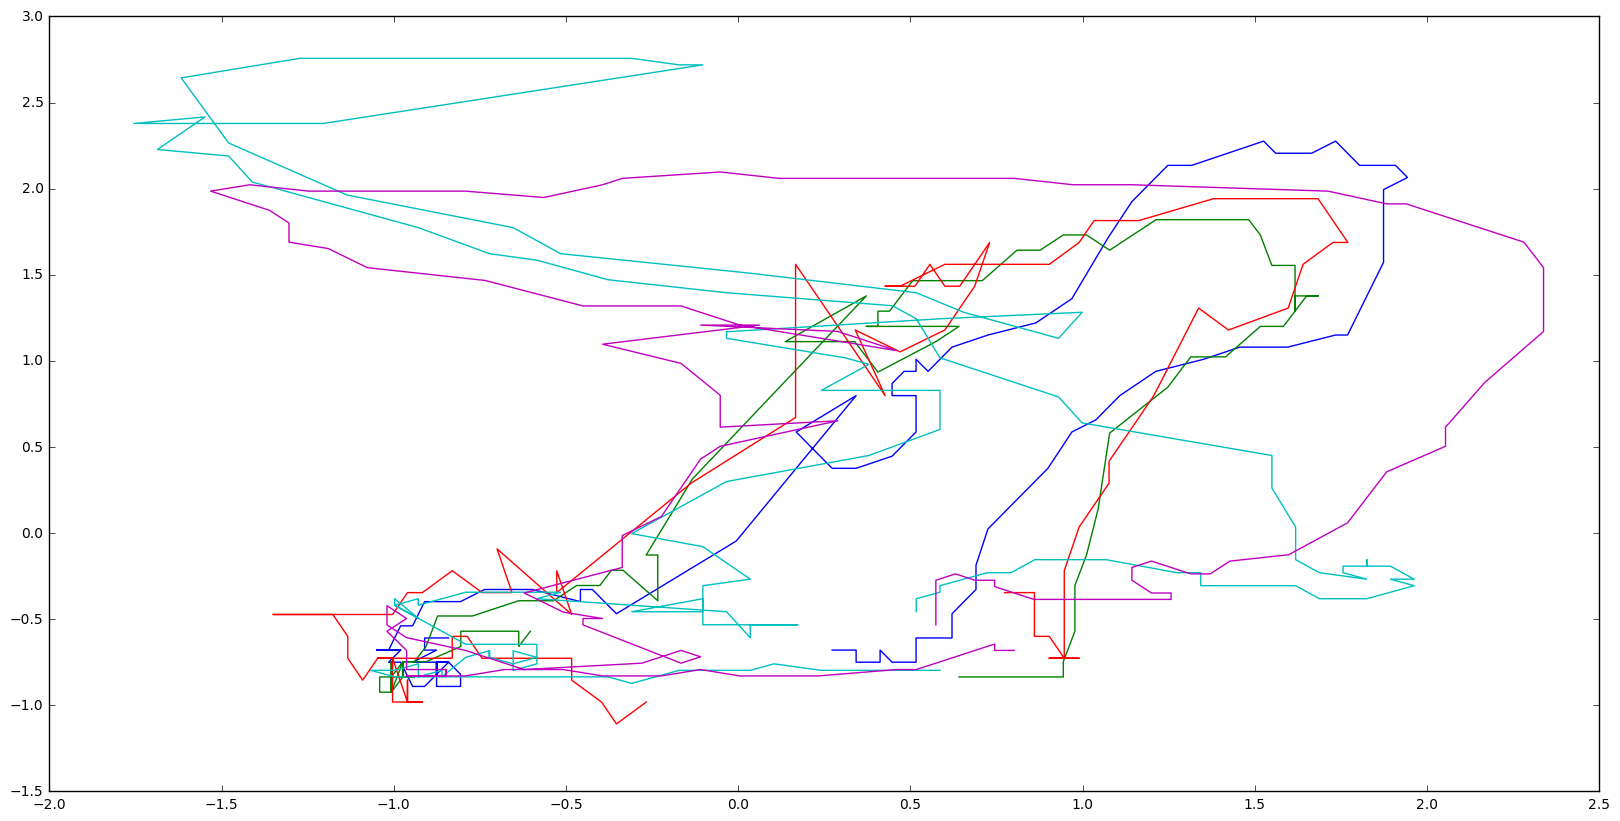

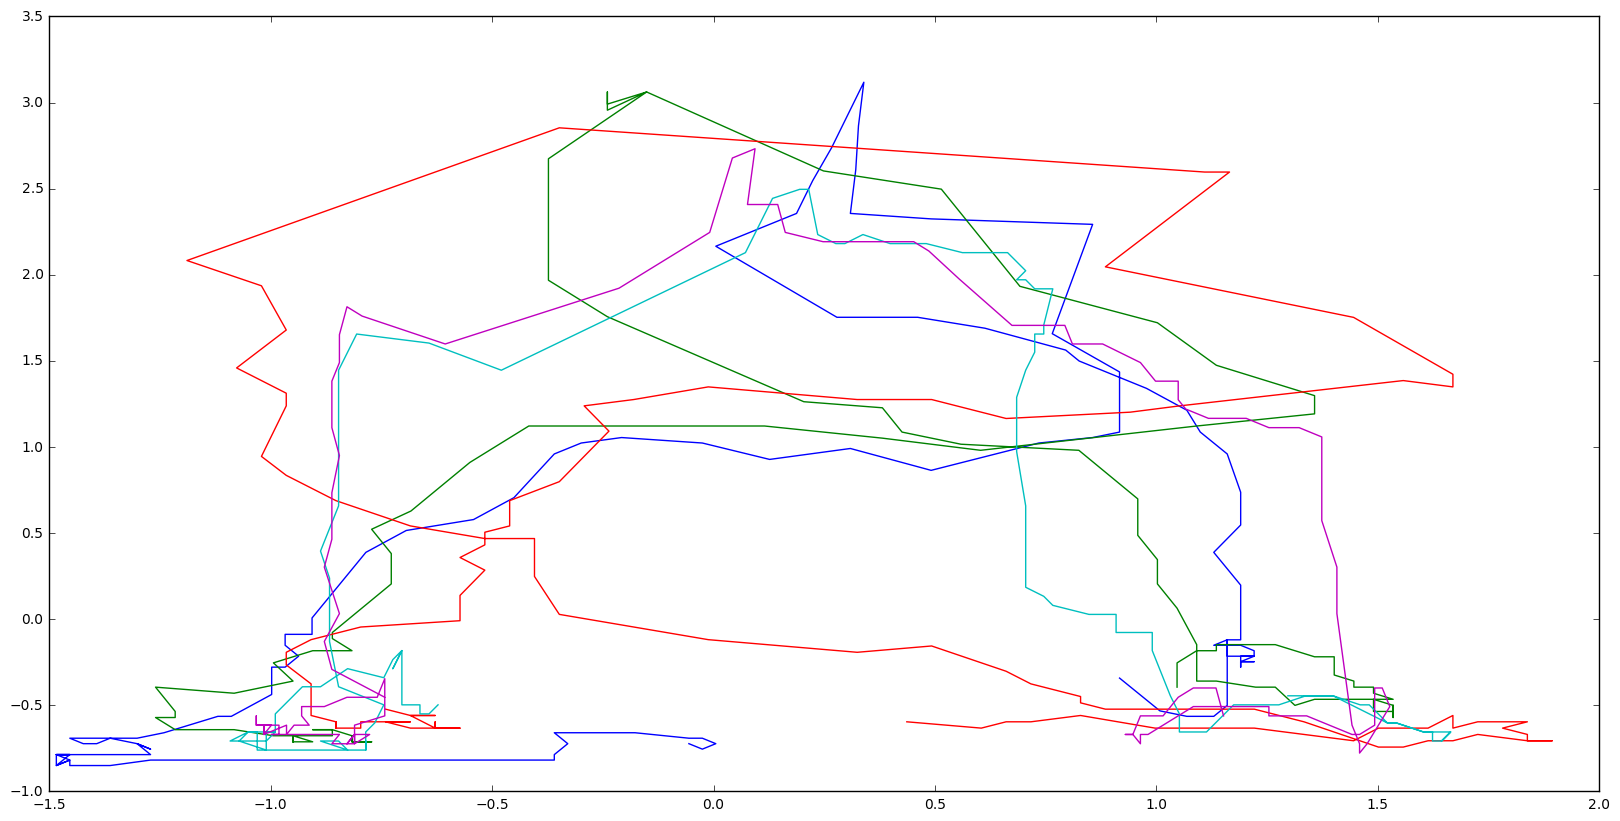

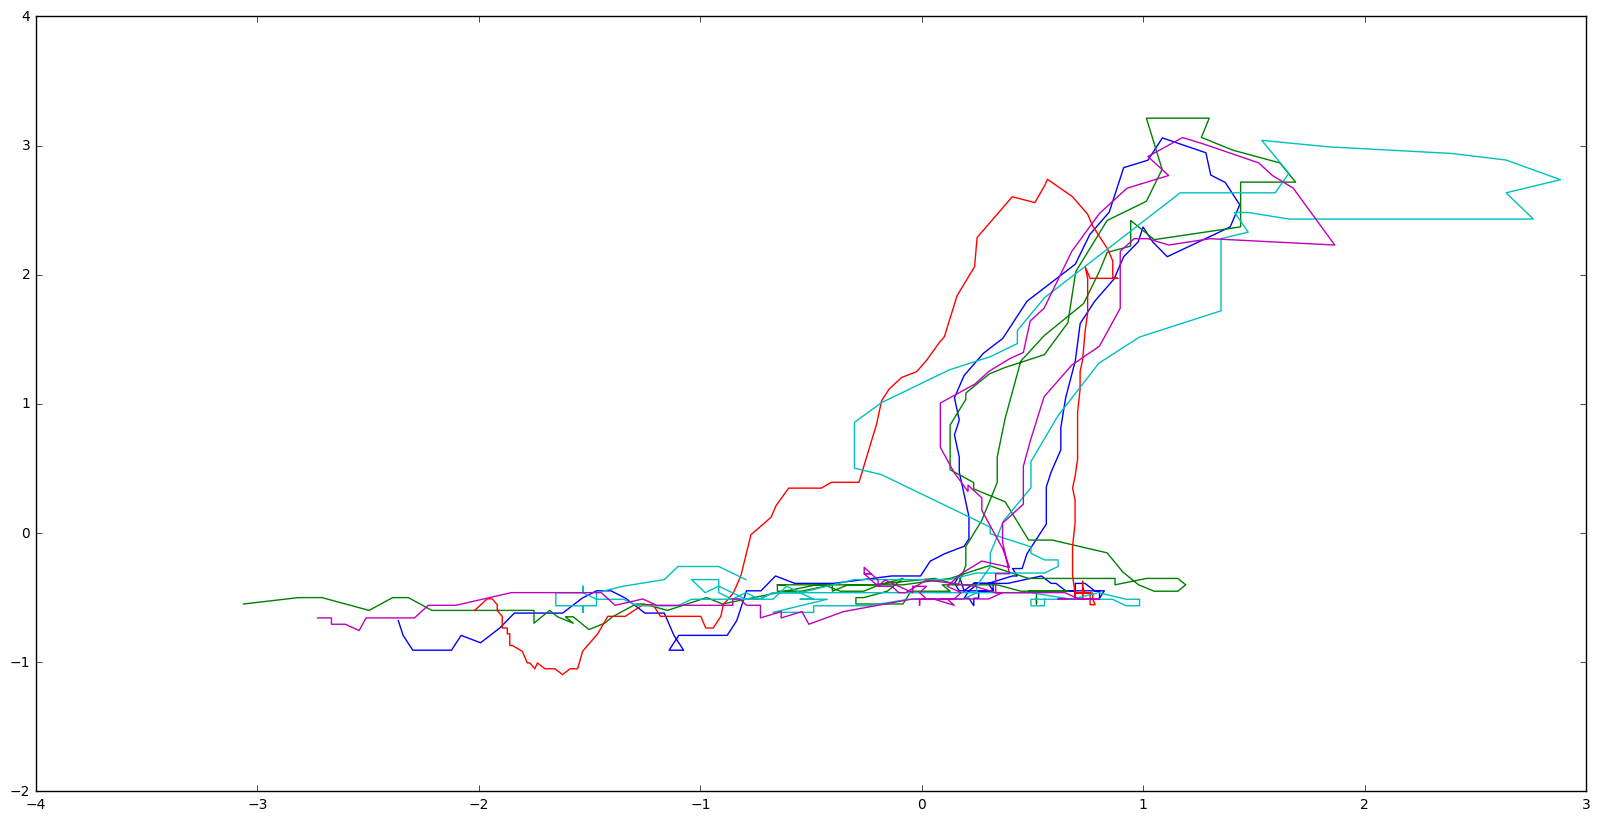

In [36]:
joints=["Right shoulder", "Left shoulder", "Right elbow", "Right wrist","Left elbow", "Left wrist",
        "Right hip", "Right knee", "Right ankle", "Left hip", "Left knee", "Left ankle", "Neck ", 
        "Right eye", "Right ear","Left eye", "Left ear"]
#aligned = Tools.align_frames(data, pre.get_release_frame(60, 120), 60, 40)
aligned = Tools.normalize(data)
ALIGNING = True
ERRORBAR = False
JOINT = 0
NR_JOINTS = 12
nr_examples = 5 #len(data) # 100
cutoff_example_nr = 30


print("JOINT: ", JOINT)
for j in range(len(index_liste)):
    stds = 0
    #print(index_liste[j][0])
    #print(index_liste[j][0][len(index_liste[j][0])//2:len(index_liste[j][0])//2+nr_examples])
    # nr_examples = len(index_liste[j][0])    #100
    index = index_liste[j][0][:nr_examples]
    #index2 = index_liste[j][0][len(index_liste[j][0])//2:len(index_liste[j][0])//2+nr_examples]
    if ALIGNING:
        frame = aligned[index]
    #    frame2 = aligned[index2]
    else:
        frame = data[index]
    #    frame2 = new_data[index2]
    plt.figure(figsize=(20,10))
    x = frame[:, :, JOINT,1]
    y = frame[:, :,JOINT,0]
    #x2 = frame2[:, :, JOINT,1]
    #y2 = frame2[:, :,JOINT,0]
    for k, exa in enumerate(x):
        #if sum(abs(exa-meX))< np.median(error) and nr<cutoff_example_nr:
        plt.plot(exa, y[k])
    #    plt.plot(x2[k], y2[k], c = "red")
    #plt.ylim(-3, 3)
    #plt.xlim(-3, 3)
    #plt.legend()
    plt.show()

In [40]:
from data_preprocess import Preprocessor
prepro = Preprocessor("cf_data.csv")
rel = prepro.get_release_frame(60, 120)

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (253,254,255,256,257,258,259,289) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


csv eingelesen with length  13150
Only Pitcher rows


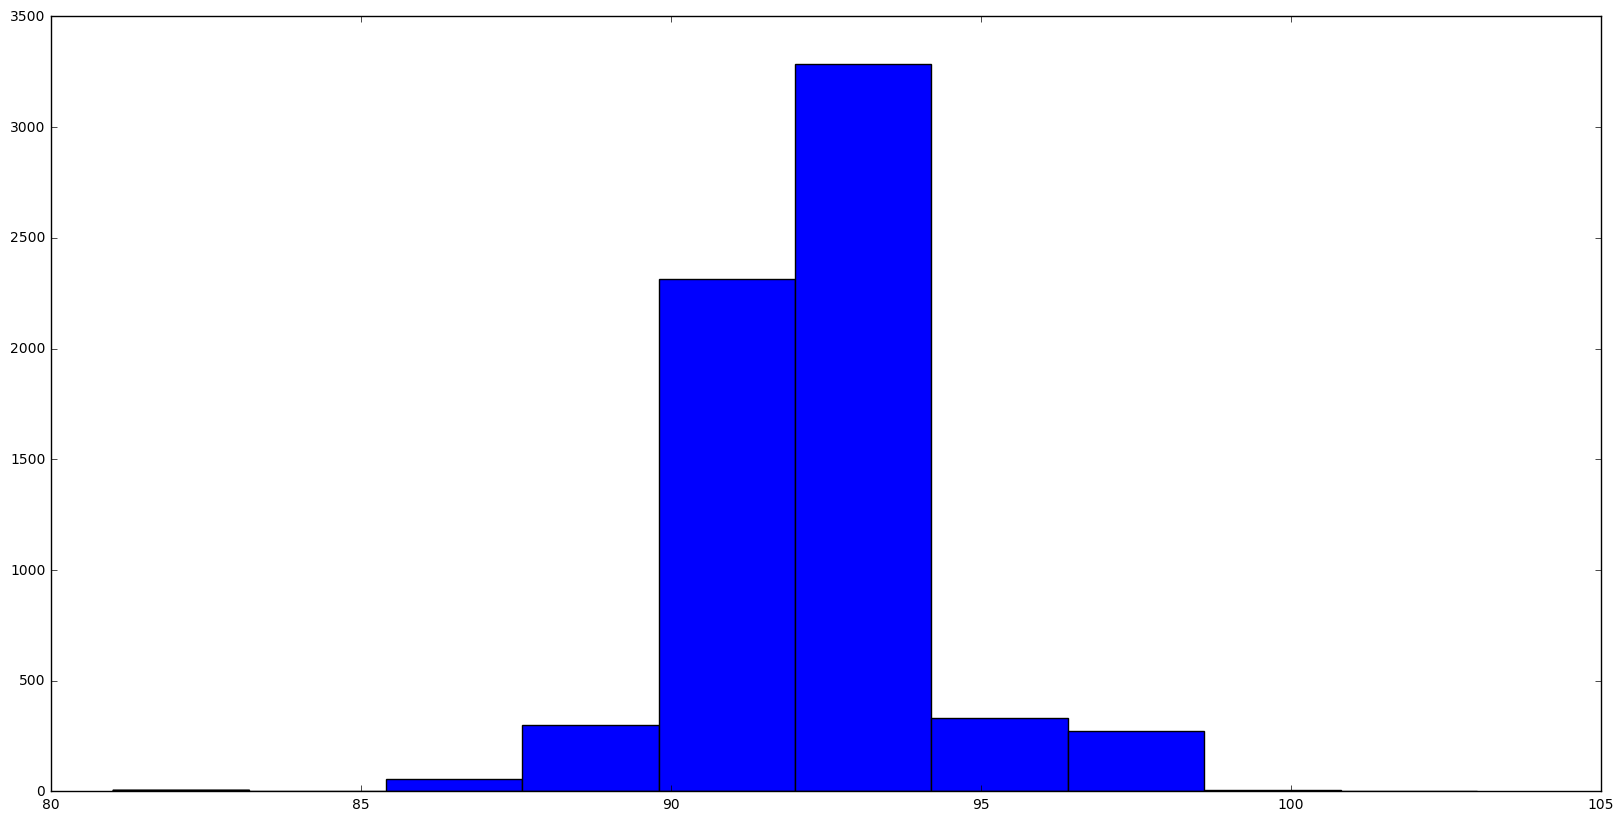

In [43]:
plt.figure(figsize = (20,10))
plt.hist(rel)
plt.show()

In [45]:
print(np.bincount(np.asarray(rel, dtype = int)))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    2    1    3    0    3    6   48   91  210
  459 1856 1366 1172  746  255   75  259   13    3    4    0    2    1]


In [72]:
arr = ["2017-05-20", "2017-05-24", "2017-06-07",
 "2017-06-11", "2017-06-19", "2017-06-23", "2017-07-05", "2017-07-17", "2017-04-15", "2017-04-19", "2017-05-03", "2017-05-07","2017-04-14", "2017-04-18",
  "2017-05-02", "2017-05-06", "2017-05-19", "2017-05-23", "2017-06-06", "2017-06-10", "2017-06-18", "2017-06-22", "2017-07-04", "2017-07-16"]
print(len(arr))
print(len(np.unique(arr)))

24
24


(30, 55, 55)
0


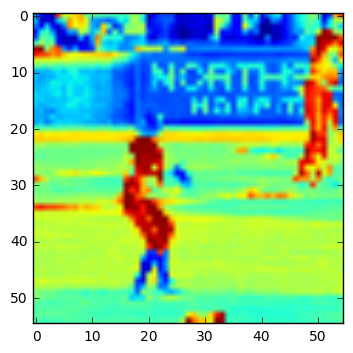

1


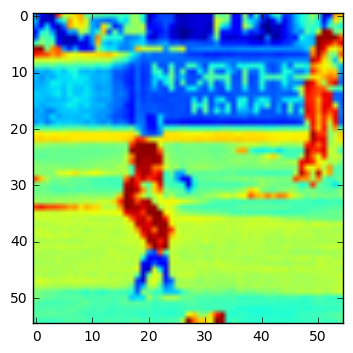

2


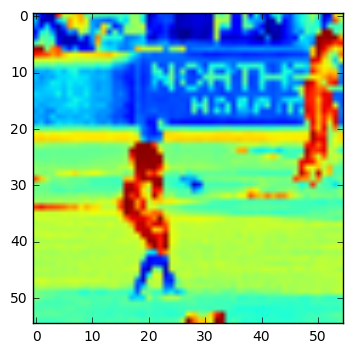

3


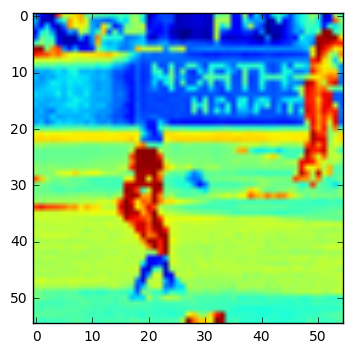

4


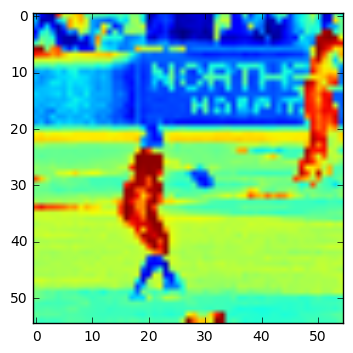

5


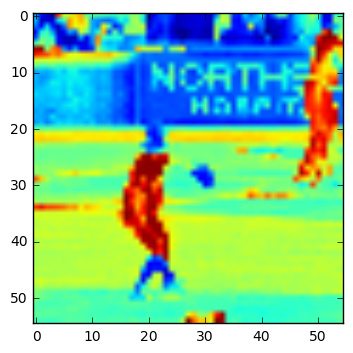

6


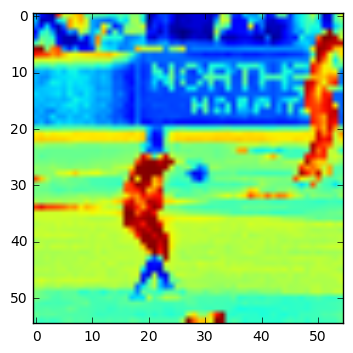

7


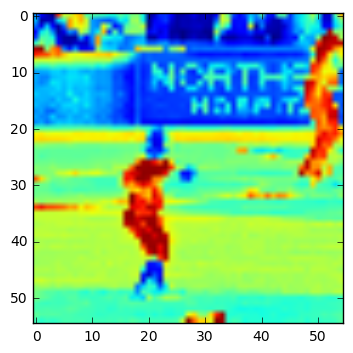

8


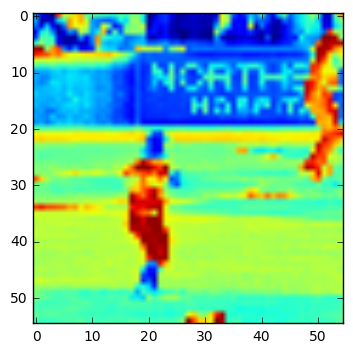

9


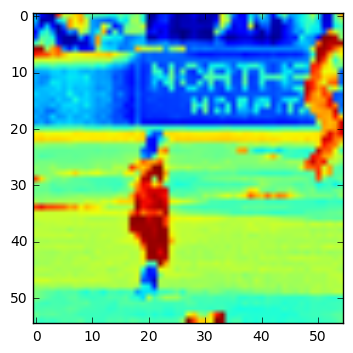

10


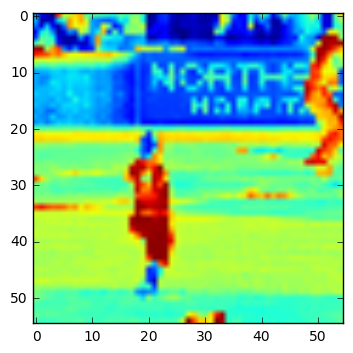

11


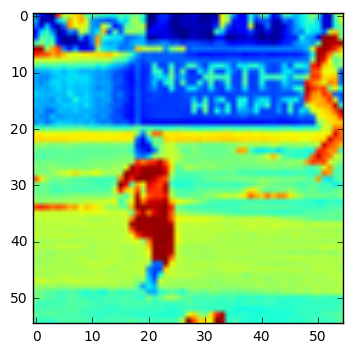

12


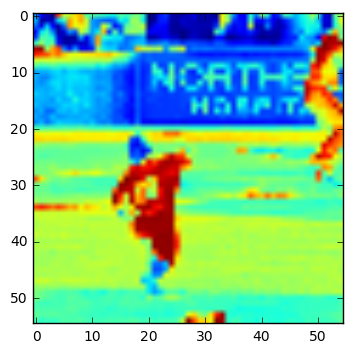

13


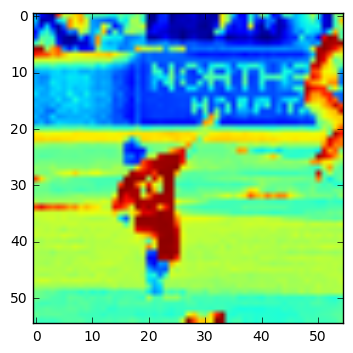

14


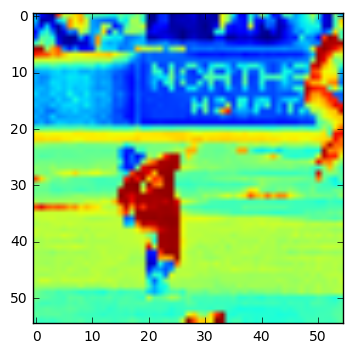

15


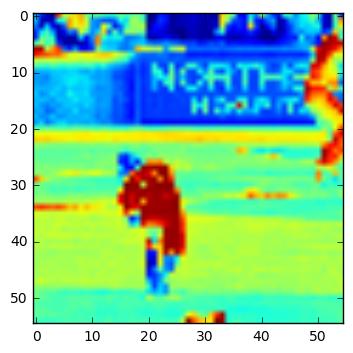

16


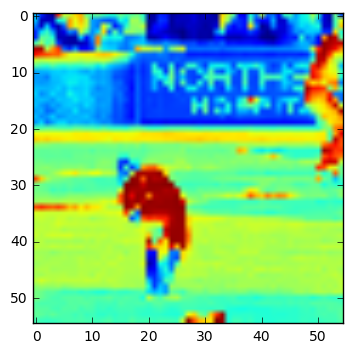

17


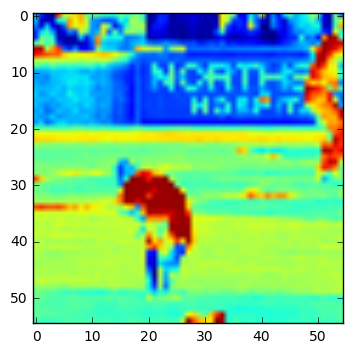

18


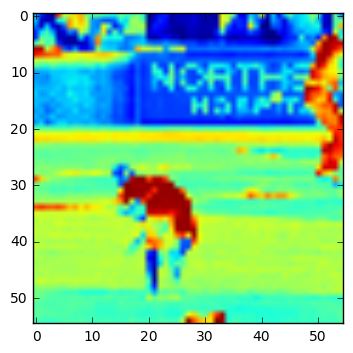

19


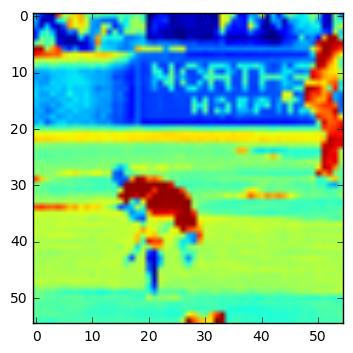

20


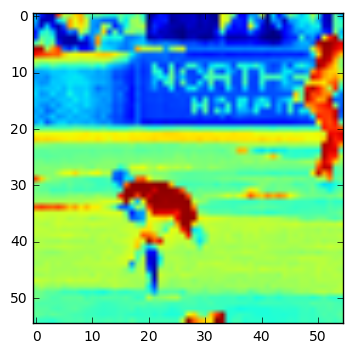

21


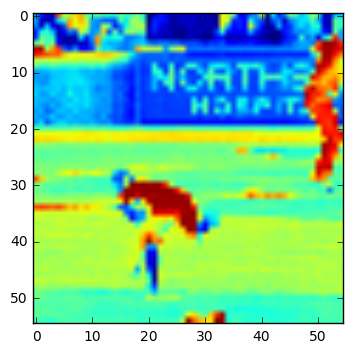

22


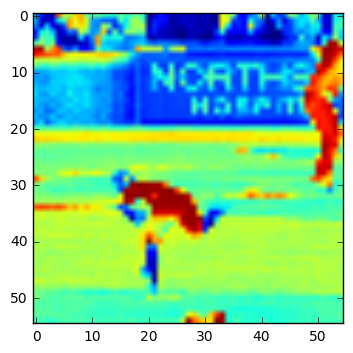

23


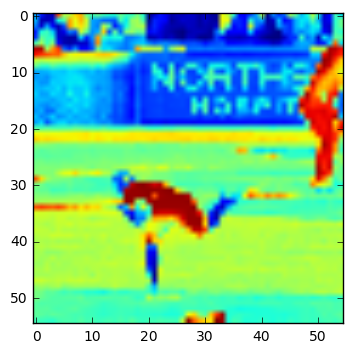

24


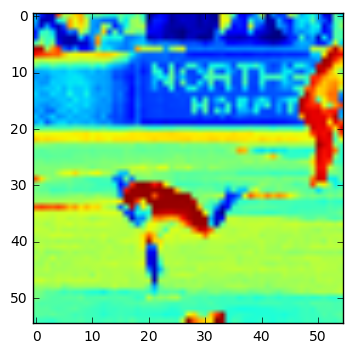

25


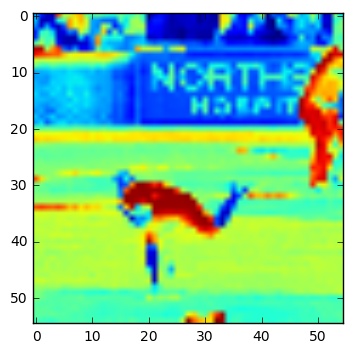

26


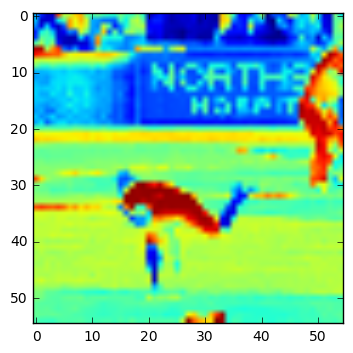

27


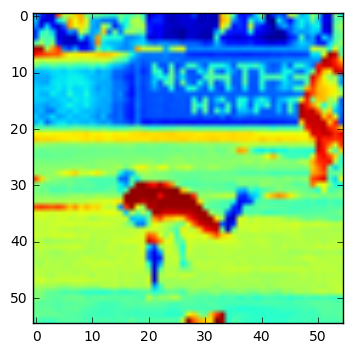

28


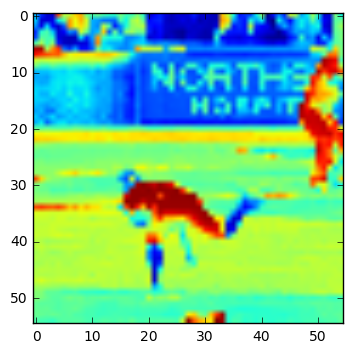

29


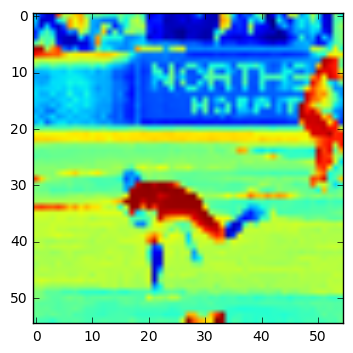

In [91]:
pos = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/all_frames.npy")
pos = np.reshape(pos, (30,55,55))
print(pos.shape)
i=0
for pic in pos:
    print(i)
    i+=1
    plt.imshow(pic)
    plt.show()

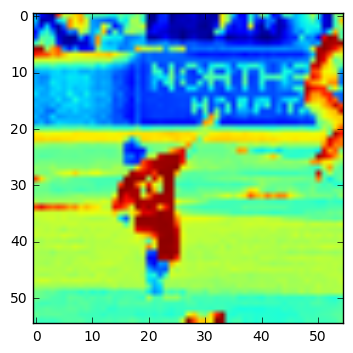

In [94]:
pos = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/predicted_frame.npy")
pos = np.reshape(pos, (55,55))
plt.imshow(pos)
plt.show()